# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import nltk
import matplotlib.pyplot as plt
import datetime
from datetime import date
import time
import pickle

# **Load functions for data cleaning**

In [2]:
%run ../labs/cleaning_mod.py

# Load Data

In [21]:
df = pd.read_excel('../0_data/captions_autocaptions.xlsx')
df.head()

,Short,Auto_caption,caption,All_text,Objectify
0,-PHbiexlr_,a picture of a woman with long black hair sits...,Stunning Mariana Rodriguez in #amencouture. Se...,Stunning Mariana Rodriguez in #amencouture. Se...,1.0
1,3YO1o0Rlkt,a picture of a woman with black hair and a bla...,@emastokholma in Amen embroidered #dress from ...,@emastokholma in Amen embroidered #dress from ...,1.0
2,4yqgDyxloK,a picture of a woman with black hair and a bla...,Stunning DJ @emastokholma wears all over paill...,Stunning DJ @emastokholma wears all over paill...,1.0
3,B-y2Fo8qcN_,a picture of a woman wearing a black jacket an...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,1.0
4,B3__d73i46x,a picture of a woman in a red dress sits on a ...,Discover our FW19 Collection on amenstyle.com ...,Discover our FW19 Collection on amenstyle.com ...,1.0


# **Clean text**

In [22]:
df['All_text'] = df['All_text'].astype(str)
df['Auto_caption'] = df['Auto_caption'].astype(str)
df['caption'] = df['caption'].astype(str)

All text

In [23]:
# superficial cleaning
df['text_sup_clean'] = df['All_text'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean'] = df['text_sup_clean'].apply(deep_cleaning)
df['text_deep_clean_pos'] = df['text_sup_clean'].apply(deep_cleaning_pos)

# extract hashtags (if present)
df['hashtags'] = df['All_text'].apply(get_hashtags)

# display the result
df.head()

C:\Users\danie\Documents\GitHub\network_science\labs\cleaning_mod.py:156: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


,Short,Auto_caption,caption,All_text,Objectify,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags
0,-PHbiexlr_,a picture of a woman with long black hair sits...,Stunning Mariana Rodriguez in #amencouture. Se...,Stunning Mariana Rodriguez in #amencouture. Se...,1.0,stunning mariana rodriguez in see the entire c...,stunning mariana rodriguez see entire collecti...,"[stunning ADJ, mariana PROPN, rodriguez PROPN,...","[amencouture, amenstyle, ss16, womenswear, ootd]"
1,3YO1o0Rlkt,a picture of a woman with black hair and a bla...,@emastokholma in Amen embroidered #dress from ...,@emastokholma in Amen embroidered #dress from ...,1.0,in amen embroidered from the spring summer co...,embroider spring summer collection discover mo...,"[embroider VERB, spring NOUN, summer NOUN, col...","[dress, amenstyle, ss15, emastokholma, ootd]"
2,4yqgDyxloK,a picture of a woman with black hair and a bla...,Stunning DJ @emastokholma wears all over paill...,Stunning DJ @emastokholma wears all over paill...,1.0,stunning dj wears all over paillettes dress fr...,stunning dj wear all paillette dress last ss c...,"[stunning ADJ, dj ADV, wear NOUN, all ADV, pai...","[dj, amenstyle, ss15, womenswear, ootd, emasto..."
3,B-y2Fo8qcN_,a picture of a woman wearing a black jacket an...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,1.0,crystal pumps a picture of a woman wearing a b...,crystal pump picture woman wear black jacket h...,"[crystal NOUN, pump VERB, picture NOUN, woman ...","[amenstyle, amenprespring20, amenaccessories]"
4,B3__d73i46x,a picture of a woman in a red dress sits on a ...,Discover our FW19 Collection on amenstyle.com ...,Discover our FW19 Collection on amenstyle.com ...,1.0,discover our fw collection on link in bio shop...,discover fw collection link bio shop line now ...,"[discover VERB, fw PROPN, collection NOUN, lin...","[amenstyle, amenfw19, declareyoursparkle]"


Captions

In [24]:
# superficial cleaning
df['text_sup_clean_caption'] = df['caption'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean_caption'] = df['text_sup_clean_caption'].apply(deep_cleaning)
df['text_deep_clean_pos_caption'] = df['text_sup_clean_caption'].apply(deep_cleaning_pos)

# extract hashtags (if present)
df['hashtags_caption'] = df['caption'].apply(get_hashtags)

C:\Users\danie\Documents\GitHub\network_science\labs\cleaning_mod.py:156: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


Autocaptions

In [25]:
# superficial cleaning
df['text_sup_clean_auto'] = df['Auto_caption'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean_auto'] = df['text_sup_clean_auto'].apply(deep_cleaning)
df['text_deep_clean_pos_auto'] = df['text_sup_clean_auto'].apply(deep_cleaning_pos)

# extract hashtags (if present)
#df['hashtags_auto'] = df['auto'].apply(get_hashtags)

C:\Users\danie\Documents\GitHub\network_science\labs\cleaning_mod.py:156: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


In [26]:
df.head()

,Short,Auto_caption,caption,All_text,Objectify,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags,text_sup_clean_caption,text_deep_clean_caption,text_deep_clean_pos_caption,hashtags_caption,text_sup_clean_auto,text_deep_clean_auto,text_deep_clean_pos_auto
0,-PHbiexlr_,a picture of a woman with long black hair sits...,Stunning Mariana Rodriguez in #amencouture. Se...,Stunning Mariana Rodriguez in #amencouture. Se...,1.0,stunning mariana rodriguez in see the entire c...,stunning mariana rodriguez see entire collecti...,"[stunning ADJ, mariana PROPN, rodriguez PROPN,...","[amencouture, amenstyle, ss16, womenswear, ootd]",stunning mariana rodriguez in see the entire c...,stunning mariana rodriguez see entire collection,"[stunning ADJ, mariana PROPN, rodriguez PROPN,...","[amencouture, amenstyle, ss16, womenswear, ootd]",a picture of a woman with long black hair sits...,picture woman long black hair sit couch front ...,"[picture NOUN, woman NOUN, long ADJ, black ADJ..."
1,3YO1o0Rlkt,a picture of a woman with black hair and a bla...,@emastokholma in Amen embroidered #dress from ...,@emastokholma in Amen embroidered #dress from ...,1.0,in amen embroidered from the spring summer co...,embroider spring summer collection discover mo...,"[embroider VERB, spring NOUN, summer NOUN, col...","[dress, amenstyle, ss15, emastokholma, ootd]",in amen embroidered from the spring summer co...,embroider spring summer collection discover more,"[embroider VERB, spring NOUN, summer NOUN, col...","[dress, amenstyle, ss15, emastokholma, ootd]",a picture of a woman with black hair and a bla...,picture woman black hair black tattoo arm wear...,"[picture NOUN, woman NOUN, black ADJ, hair NOU..."
2,4yqgDyxloK,a picture of a woman with black hair and a bla...,Stunning DJ @emastokholma wears all over paill...,Stunning DJ @emastokholma wears all over paill...,1.0,stunning dj wears all over paillettes dress fr...,stunning dj wear all paillette dress last ss c...,"[stunning ADJ, dj ADV, wear NOUN, all ADV, pai...","[dj, amenstyle, ss15, womenswear, ootd, emasto...",stunning dj wears all over paillettes dress fr...,stunning dj wear all paillette dress last ss c...,"[stunning ADJ, dj ADV, wear NOUN, all ADV, pai...","[dj, amenstyle, ss15, womenswear, ootd, emasto...",a picture of a woman with black hair and a bla...,picture woman black hair black tattoo arm pose...,"[picture NOUN, woman NOUN, black ADJ, hair NOU..."
3,B-y2Fo8qcN_,a picture of a woman wearing a black jacket an...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,1.0,crystal pumps a picture of a woman wearing a b...,crystal pump picture woman wear black jacket h...,"[crystal NOUN, pump VERB, picture NOUN, woman ...","[amenstyle, amenprespring20, amenaccessories]",crystal pumps,crystal pump,"[crystal NOUN, pump VERB]","[amenstyle, amenprespring20, amenaccessories]",a picture of a woman wearing a black jacket an...,picture woman wear black jacket heel sit red c...,"[picture NOUN, woman NOUN, wear VERB, black AD..."
4,B3__d73i46x,a picture of a woman in a red dress sits on a ...,Discover our FW19 Collection on amenstyle.com ...,Discover our FW19 Collection on amenstyle.com ...,1.0,discover our fw collection on link in bio shop...,discover fw collection link bio shop line now ...,"[discover VERB, fw PROPN, collection NOUN, lin...","[amenstyle, amenfw19, declareyoursparkle]",discover our fw collection on link in bio shop...,discover fw collection link bio shop line now,"[discover VERB, fw PROPN, collection NOUN, lin...","[amenstyle, amenfw19, declareyoursparkle]",a picture of a woman in a red dress sits on a ...,picture woman red dress sit leather couch hold...,"[picture NOUN, woman NOUN, red ADJ, dress NOUN..."


In [27]:
df.columns

Index(['Short', 'Auto_caption', 'caption', 'All_text', 'Objectify',
       'text_sup_clean', 'text_deep_clean', 'text_deep_clean_pos', 'hashtags',
       'text_sup_clean_caption', 'text_deep_clean_caption',
       'text_deep_clean_pos_caption', 'hashtags_caption',
       'text_sup_clean_auto', 'text_deep_clean_auto',
       'text_deep_clean_pos_auto'],
      dtype='object')

In [28]:
df_save = df[['Short', 'Objectify','text_deep_clean_caption','text_deep_clean_auto','text_deep_clean']].copy()
df_save.columns = ['Short', 'Objectify', 'clean_caption', 'clean_autocaption', 'clean_all']
df_save.head()

,Short,Objectify,clean_caption,clean_autocaption,clean_all
0,-PHbiexlr_,1.0,stunning mariana rodriguez see entire collection,picture woman long black hair sit couch front ...,stunning mariana rodriguez see entire collecti...
1,3YO1o0Rlkt,1.0,embroider spring summer collection discover more,picture woman black hair black tattoo arm wear...,embroider spring summer collection discover mo...
2,4yqgDyxloK,1.0,stunning dj wear all paillette dress last ss c...,picture woman black hair black tattoo arm pose...,stunning dj wear all paillette dress last ss c...
3,B-y2Fo8qcN_,1.0,crystal pump,picture woman wear black jacket heel sit red c...,crystal pump picture woman wear black jacket h...
4,B3__d73i46x,1.0,discover fw collection link bio shop line now,picture woman red dress sit leather couch hold...,discover fw collection link bio shop line now ...


In [29]:
# store the results
out_dir = "../0_data/"
out_file = "text"
df_save.to_excel(out_dir+out_file+"_clean.xlsx", index=True)

In [30]:
# store the results
out_dir = "../0_data/"
out_file = "text"
df.to_excel(out_dir+out_file+"_clean_large.xlsx", index=True)

# **Build an occurrence matrix for words and hashtags**

In [38]:
# store the results
dir = "../0_data/"
file = "text"
df = pd.read_excel(dir+file+"_clean_large.xlsx")
df.rename(columns={'Unnamed: 0':'id'}, inplace = True)
df.head()

,id,Short,Auto_caption,caption,All_text,Objectify,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags,text_sup_clean_caption,text_deep_clean_caption,text_deep_clean_pos_caption,hashtags_caption,text_sup_clean_auto,text_deep_clean_auto,text_deep_clean_pos_auto
0,0,-PHbiexlr_,a picture of a woman with long black hair sits...,Stunning Mariana Rodriguez in #amencouture. Se...,Stunning Mariana Rodriguez in #amencouture. Se...,1.0,stunning mariana rodriguez in see the entire c...,stunning mariana rodriguez see entire collecti...,"['stunning ADJ', 'mariana PROPN', 'rodriguez P...","['amencouture', 'amenstyle', 'ss16', 'womenswe...",stunning mariana rodriguez in see the entire c...,stunning mariana rodriguez see entire collection,"['stunning ADJ', 'mariana PROPN', 'rodriguez P...","['amencouture', 'amenstyle', 'ss16', 'womenswe...",a picture of a woman with long black hair sits...,picture woman long black hair sit couch front ...,"['picture NOUN', 'woman NOUN', 'long ADJ', 'bl..."
1,1,3YO1o0Rlkt,a picture of a woman with black hair and a bla...,@emastokholma in Amen embroidered #dress from ...,@emastokholma in Amen embroidered #dress from ...,1.0,in amen embroidered from the spring summer co...,embroider spring summer collection discover mo...,"['embroider VERB', 'spring NOUN', 'summer NOUN...","['dress', 'amenstyle', 'ss15', 'emastokholma',...",in amen embroidered from the spring summer co...,embroider spring summer collection discover more,"['embroider VERB', 'spring NOUN', 'summer NOUN...","['dress', 'amenstyle', 'ss15', 'emastokholma',...",a picture of a woman with black hair and a bla...,picture woman black hair black tattoo arm wear...,"['picture NOUN', 'woman NOUN', 'black ADJ', 'h..."
2,2,4yqgDyxloK,a picture of a woman with black hair and a bla...,Stunning DJ @emastokholma wears all over paill...,Stunning DJ @emastokholma wears all over paill...,1.0,stunning dj wears all over paillettes dress fr...,stunning dj wear all paillette dress last ss c...,"['stunning ADJ', 'dj ADV', 'wear NOUN', 'all A...","['dj', 'amenstyle', 'ss15', 'womenswear', 'oot...",stunning dj wears all over paillettes dress fr...,stunning dj wear all paillette dress last ss c...,"['stunning ADJ', 'dj ADV', 'wear NOUN', 'all A...","['dj', 'amenstyle', 'ss15', 'womenswear', 'oot...",a picture of a woman with black hair and a bla...,picture woman black hair black tattoo arm pose...,"['picture NOUN', 'woman NOUN', 'black ADJ', 'h..."
3,3,B-y2Fo8qcN_,a picture of a woman wearing a black jacket an...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,1.0,crystal pumps a picture of a woman wearing a b...,crystal pump picture woman wear black jacket h...,"['crystal NOUN', 'pump VERB', 'picture NOUN', ...","['amenstyle', 'amenprespring20', 'amenaccessor...",crystal pumps,crystal pump,"['crystal NOUN', 'pump VERB']","['amenstyle', 'amenprespring20', 'amenaccessor...",a picture of a woman wearing a black jacket an...,picture woman wear black jacket heel sit red c...,"['picture NOUN', 'woman NOUN', 'wear VERB', 'b..."
4,4,B3__d73i46x,a picture of a woman in a red dress sits on a ...,Discover our FW19 Collection on amenstyle.com ...,Discover our FW19 Collection on amenstyle.com ...,1.0,discover our fw collection on link in bio shop...,discover fw collection link bio shop line now ...,"['discover VERB', 'fw PROPN', 'collection NOUN...","['amenstyle', 'amenfw19', 'declareyoursparkle']",discover our fw collection on link in bio shop...,discover fw collection link bio shop line now,"['discover VERB', 'fw PROPN', 'collection NOUN...","['amenstyle', 'amenfw19', 'declareyoursparkle']",a picture of a woman in a red dress sits on a ...,picture woman red dress sit leather couch hold...,"['picture NOUN', 'woman NOUN', 'red ADJ', 'dre..."


In [39]:
# collection of words
words = np.unique([item for sublist in df['text_deep_clean_pos'] for item in sublist])
# words dictionary
words_dict = dict(zip(words,range(len(words))))
# occurrence matrix for words
Mwd = csr_matrix((len(words_dict), len(df)), dtype = np.int8).toarray()
for i in range(len(df)):
  for j in df['text_deep_clean_pos'][i]:
    Mwd[words_dict[j],i] += 1

In [40]:
# collection of hashtags
hashtags = np.unique([item for sublist in df['hashtags'] for item in sublist])
# add the # sign
hashtags2 = np.unique(["#"+item for sublist in df['hashtags'] for item in sublist])
# hashtags dictionary
hashtags_dict = dict(zip(hashtags,range(len(hashtags))))
# occurrence matrix for hashtags
Mhd = csr_matrix((len(hashtags_dict), len(df)), dtype = np.int8).toarray()
for i in range(len(df)):
  for j in df['hashtags'][i]:
    Mhd[hashtags_dict[j],i] += 1

In [41]:
# join words and hashtags
Mwd = np.vstack((Mwd, Mhd)) # in one occurrence matrix
words = np.hstack((words, hashtags2)) # in one word+hashtags list
documents = np.array(df["id"].tolist()) # further collect documents names

# **Remove least occurring words**

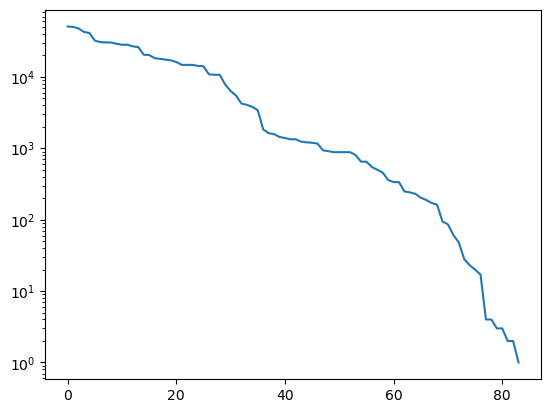

In [42]:
# display word occurrences first
plt.figure()
plt.semilogy(-np.sort(-np.sum(Mwd,axis=1)))
plt.savefig(out_dir+out_file+"_statistics.png")

In [11]:
# remove words that are used once or twice
select = (np.sum(Mwd,axis=1)>2)
Mwd = Mwd[select,:]
words = words[select]
# remove documents that do not contain words
select = (np.sum(Mwd,axis=0)>0)
Mwd = Mwd[:,select]
documents = documents[select]
# display final matrix size
display(Mwd.shape)

(620, 280)

In [12]:
# store the result
pickle.dump([Mwd,words,documents], open(out_dir+out_file+"_occurrences.p", "wb"))
# c,d,e = pickle.load(open(out_dir+out_file+"_occurrences.p","rb"))